<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/main/8_AdvancedTrainingConcepts/experiments/Cifar10_with_resnet34_LN_LR/Cifar10_with_resnet34_LN_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
!pip install git+https://github.com/albumentations-team/albumentations.git
!pip install torchsummary

  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-wi21ml1u
  Running command git clone -q https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-wi21ml1u
  Created wheel for albumentations: filename=albumentations-1.0.0-cp37-none-any.whl size=98531 sha256=93bd8666f633b6ce1214244cb03d5f969c707616d0e0288334864728408b1eee
  Stored in directory: /tmp/pip-ephem-wheel-cache-j_nrwjve/wheels/e2/85/3e/2a40fac5cc1f43ced656603bb2fca1327b30ec7de1b1b66517
Successfully built albumentations
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [2]:
!git clone https://github.com/gkdivya/torch_cv_wrapper.git

Cloning into 'torch_cv_wrapper'...
remote: Enumerating objects: 252, done.
remote: Counting objects: 100% (252/252), done.
remote: Compressing objects: 100% (242/242), done.
remote: Total 252 (delta 145), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (252/252), 59.99 KiB | 787.00 KiB/s, done.
Resolving deltas: 100% (145/145), done.


In [3]:
!git clone https://github.com/gkdivya/eva.git

Cloning into 'eva'...
remote: Enumerating objects: 2247, done.
remote: Counting objects: 100% (1070/1070), done.
remote: Compressing objects: 100% (709/709), done.
remote: Total 2247 (delta 801), reused 336 (delta 336), pack-reused 1177
Receiving objects: 100% (2247/2247), 20.32 MiB | 9.37 MiB/s, done.
Resolving deltas: 100% (1286/1286), done.


In [4]:
from __future__ import print_function
import torchvision
import torch
from pprint import pprint
# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

## Import Custom Libraries
from torch_cv_wrapper.utils import plot_metrics,train,test,helper
from torch_cv_wrapper.utils.gradcam import generate_gradcam, plot_gradcam
from torch_cv_wrapper.model import resnet
from torch_cv_wrapper.main import TriggerEngine

## Load config file

In [5]:
config = helper.process_config("/content/eva/8_AdvancedTrainingConcepts/experiments/Cifar10_with_resnet34_LN_LR/config.yaml")
use_cuda = torch.cuda.is_available()
helper.set_seed(config['model_params']['seed'],use_cuda)
device = torch.device("cuda" if use_cuda else "cpu")
pprint(config)

 loading Configuration of your experiment ..
{'criterion': 'CrossEntropyLoss',
 'data_augmentation': {'type': 'CIFAR10Albumentation'},
 'data_loader': {'args': {'batch_size': 256,
                          'num_workers': 2,
                          'pin_memory': True},
                 'classes': ['plane',
                             'car',
                             'bird',
                             'cat',
                             'deer',
                             'dog',
                             'frog',
                             'horse',
                             'ship',
                             'truck'],
                 'type': 'Cifar10DataLoader'},
 'lr_scheduler': 'LRScheduler',
 'model': 'Resnet34',
 'model_params': {'dropout': 0.05,
                  'experiment_name': 'cifar10_with_resnet34_LN_LR',
                  'model_dir': './model/',
                  'seed': 1},
 'optimizer': {'args': {'lr': 0.001}, 'type': 'optim.Adam'},
 'training_params': 

## Create Training Instance

In [6]:
exp_metrics={}
experiment_name=config['model_params']['experiment_name']
trigger_training=TriggerEngine(config)

## Download data and view sample images

In [7]:
classes= config['data_loader']['classes']

#Get dataloaders
train_loader,test_loader = trigger_training.dataloader()


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


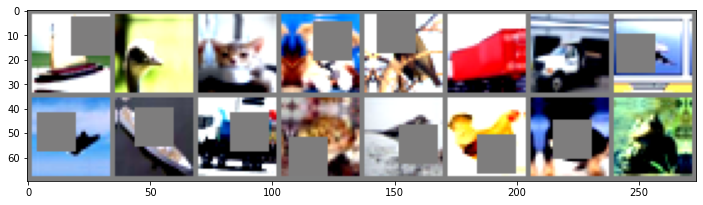

In [8]:
# get some random training images
images, labels = iter(train_loader).next()

# # show images
helper.imshow(torchvision.utils.make_grid(images[:16]))

## Model Summary

In [9]:
model = resnet.ResNet34("LN")
model.to(device)
trigger_training.model_summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
         GroupNorm-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
         GroupNorm-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
         GroupNorm-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
         GroupNorm-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
        GroupNorm-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 64, 32, 32]          36,864
        GroupNorm-14           [-1, 64,

## Trigger training

In [10]:
# trigger_training.
(exp_metrics[experiment_name]) = trigger_training.run_experiment(model,train_loader,test_loader)
#trigger_training.save_experiment(model,experiment_name,"/content/drive/MyDrive/Cifar10_Resnet/saved_models")

  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 1:


Loss=2.126213550567627 Batch_id=195 LR=0.00100 Accuracy=15.62: 100%|██████████| 196/196 [01:12<00:00,  2.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 2428/10000 (24.28%)

Epoch 2:


Loss=2.0930659770965576 Batch_id=195 LR=0.00100 Accuracy=27.74: 100%|██████████| 196/196 [01:13<00:00,  2.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 3618/10000 (36.18%)

Epoch 3:


Loss=1.6387102603912354 Batch_id=195 LR=0.00100 Accuracy=35.22: 100%|██████████| 196/196 [01:13<00:00,  2.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 3985/10000 (39.85%)

Epoch 4:


Loss=1.5427160263061523 Batch_id=195 LR=0.00100 Accuracy=39.24: 100%|██████████| 196/196 [01:13<00:00,  2.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 4485/10000 (44.85%)

Epoch 5:


Loss=1.4602245092391968 Batch_id=195 LR=0.00100 Accuracy=42.38: 100%|██████████| 196/196 [01:13<00:00,  2.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 4917/10000 (49.17%)

Epoch 6:


Loss=1.5156711339950562 Batch_id=195 LR=0.00100 Accuracy=45.70: 100%|██████████| 196/196 [01:13<00:00,  2.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 5092/10000 (50.92%)

Epoch 7:


Loss=1.4081823825836182 Batch_id=195 LR=0.00100 Accuracy=47.98: 100%|██████████| 196/196 [01:13<00:00,  2.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 5093/10000 (50.93%)

Epoch 8:


Loss=1.1827881336212158 Batch_id=195 LR=0.00100 Accuracy=50.76: 100%|██████████| 196/196 [01:13<00:00,  2.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 5653/10000 (56.53%)

Epoch 9:


Loss=1.1028493642807007 Batch_id=195 LR=0.00100 Accuracy=53.00: 100%|██████████| 196/196 [01:13<00:00,  2.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 5487/10000 (54.87%)

Epoch 10:


Loss=1.1855688095092773 Batch_id=195 LR=0.00100 Accuracy=54.84: 100%|██████████| 196/196 [01:13<00:00,  2.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 5746/10000 (57.46%)

Epoch 11:


Loss=0.9056015014648438 Batch_id=195 LR=0.00100 Accuracy=56.59: 100%|██████████| 196/196 [01:13<00:00,  2.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 5594/10000 (55.94%)

Epoch 12:


Loss=1.237310528755188 Batch_id=195 LR=0.00100 Accuracy=58.86: 100%|██████████| 196/196 [01:13<00:00,  2.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 6167/10000 (61.67%)

Epoch 13:


Loss=0.8905419111251831 Batch_id=195 LR=0.00100 Accuracy=60.75: 100%|██████████| 196/196 [01:13<00:00,  2.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 6706/10000 (67.06%)

Epoch 14:


Loss=1.147619366645813 Batch_id=195 LR=0.00100 Accuracy=62.16: 100%|██████████| 196/196 [01:13<00:00,  2.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 6758/10000 (67.58%)

Epoch 15:


Loss=0.9696875810623169 Batch_id=195 LR=0.00100 Accuracy=64.25: 100%|██████████| 196/196 [01:13<00:00,  2.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 6662/10000 (66.62%)

Epoch 16:


Loss=0.8942207098007202 Batch_id=195 LR=0.00100 Accuracy=65.32: 100%|██████████| 196/196 [01:13<00:00,  2.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 6713/10000 (67.13%)

Epoch 17:


Loss=0.9629359245300293 Batch_id=195 LR=0.00100 Accuracy=66.76: 100%|██████████| 196/196 [01:13<00:00,  2.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7226/10000 (72.26%)

Epoch 18:


Loss=1.1148730516433716 Batch_id=195 LR=0.00100 Accuracy=68.03: 100%|██████████| 196/196 [01:12<00:00,  2.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7185/10000 (71.85%)

Epoch 19:


Loss=0.8967512249946594 Batch_id=195 LR=0.00100 Accuracy=69.18: 100%|██████████| 196/196 [01:12<00:00,  2.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7592/10000 (75.92%)

Epoch 20:


Loss=1.0061562061309814 Batch_id=195 LR=0.00100 Accuracy=70.08: 100%|██████████| 196/196 [01:12<00:00,  2.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7587/10000 (75.87%)

Epoch 21:


Loss=0.714241623878479 Batch_id=195 LR=0.00100 Accuracy=71.70: 100%|██████████| 196/196 [01:12<00:00,  2.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7681/10000 (76.81%)

Epoch 22:


Loss=0.884232223033905 Batch_id=195 LR=0.00100 Accuracy=72.83: 100%|██████████| 196/196 [01:12<00:00,  2.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7818/10000 (78.18%)

Epoch 23:


Loss=0.7373778223991394 Batch_id=195 LR=0.00100 Accuracy=73.49: 100%|██████████| 196/196 [01:12<00:00,  2.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7600/10000 (76.00%)

Epoch 24:


Loss=0.430425226688385 Batch_id=195 LR=0.00100 Accuracy=74.91: 100%|██████████| 196/196 [01:12<00:00,  2.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7851/10000 (78.51%)

Epoch 25:


Loss=0.5914815068244934 Batch_id=195 LR=0.00100 Accuracy=75.40: 100%|██████████| 196/196 [01:12<00:00,  2.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7913/10000 (79.13%)

Epoch 26:


Loss=0.7327349185943604 Batch_id=195 LR=0.00100 Accuracy=76.35: 100%|██████████| 196/196 [01:12<00:00,  2.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8061/10000 (80.61%)

Epoch 27:


Loss=0.6742702722549438 Batch_id=195 LR=0.00100 Accuracy=77.20: 100%|██████████| 196/196 [01:12<00:00,  2.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8176/10000 (81.76%)

Epoch 28:


Loss=0.448188453912735 Batch_id=195 LR=0.00100 Accuracy=78.05: 100%|██████████| 196/196 [01:12<00:00,  2.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8275/10000 (82.75%)

Epoch 29:


Loss=0.6270964741706848 Batch_id=195 LR=0.00100 Accuracy=78.96: 100%|██████████| 196/196 [01:12<00:00,  2.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8220/10000 (82.20%)

Epoch 30:


Loss=0.6902934312820435 Batch_id=195 LR=0.00100 Accuracy=79.00: 100%|██████████| 196/196 [01:12<00:00,  2.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8375/10000 (83.75%)

Epoch 31:


Loss=0.42387065291404724 Batch_id=195 LR=0.00100 Accuracy=79.76: 100%|██████████| 196/196 [01:12<00:00,  2.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8214/10000 (82.14%)

Epoch 32:


Loss=0.7009815573692322 Batch_id=195 LR=0.00100 Accuracy=80.42: 100%|██████████| 196/196 [01:12<00:00,  2.71it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8089/10000 (80.89%)

Epoch 33:


Loss=0.641717255115509 Batch_id=195 LR=0.00100 Accuracy=80.96: 100%|██████████| 196/196 [01:12<00:00,  2.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8434/10000 (84.34%)

Epoch 34:


Loss=0.577523410320282 Batch_id=195 LR=0.00100 Accuracy=81.36: 100%|██████████| 196/196 [01:12<00:00,  2.71it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8536/10000 (85.36%)

Epoch 35:


Loss=0.5308898091316223 Batch_id=195 LR=0.00100 Accuracy=81.57: 100%|██████████| 196/196 [01:12<00:00,  2.71it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8439/10000 (84.39%)

Epoch 36:


Loss=0.44286662340164185 Batch_id=195 LR=0.00100 Accuracy=81.94: 100%|██████████| 196/196 [01:12<00:00,  2.71it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8478/10000 (84.78%)

Epoch 37:


Loss=0.5117711424827576 Batch_id=195 LR=0.00100 Accuracy=82.74: 100%|██████████| 196/196 [01:12<00:00,  2.71it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8536/10000 (85.36%)

Epoch 38:


Loss=0.566335141658783 Batch_id=195 LR=0.00100 Accuracy=82.87: 100%|██████████| 196/196 [01:12<00:00,  2.71it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8311/10000 (83.11%)

Epoch    38: reducing learning rate of group 0 to 2.0000e-04.
Epoch 39:


Loss=0.29966557025909424 Batch_id=195 LR=0.00020 Accuracy=86.75: 100%|██████████| 196/196 [01:12<00:00,  2.71it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 8862/10000 (88.62%)

Epoch 40:


Loss=0.3482409119606018 Batch_id=195 LR=0.00020 Accuracy=87.25: 100%|██████████| 196/196 [01:12<00:00,  2.71it/s]



Test set: Average loss: 0.0014, Accuracy: 8854/10000 (88.54%)



## Missclassification

Total wrong predictions are 1146
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


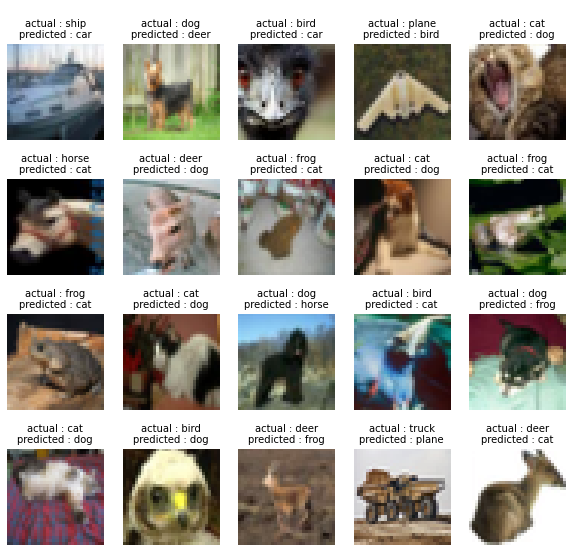

In [11]:
misclassified_images = trigger_training.wrong_predictions(model,test_loader)

## Plots for Validation Loss and Accuracy

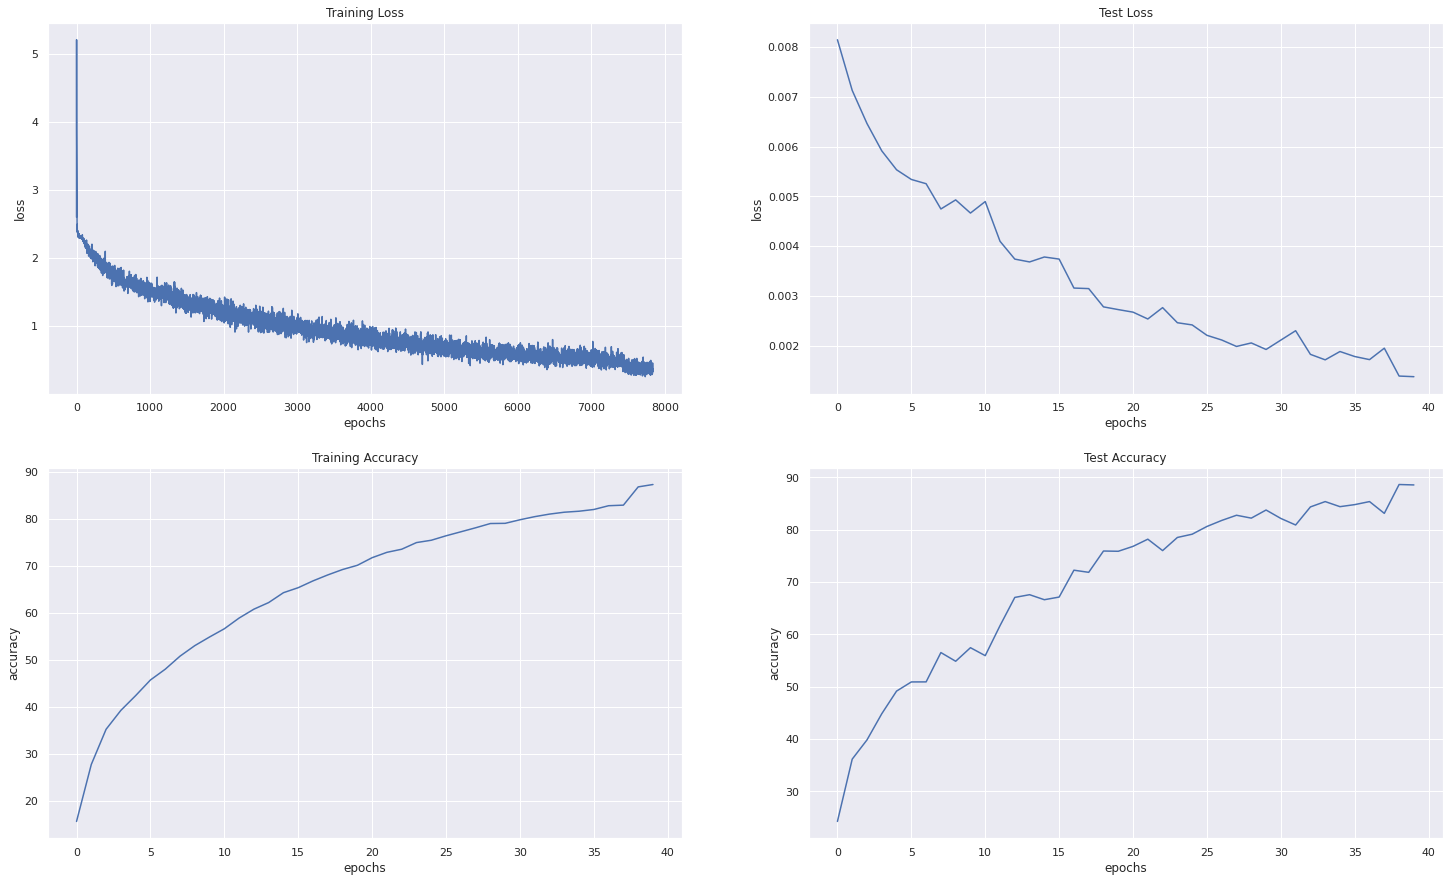

In [12]:
plot_metrics.plot_metrics(exp_metrics[experiment_name])

## Accuracy for each class

In [13]:
helper.class_level_accuracy(model, test_loader, device, classes)

Accuracy of plane : 93 %
Accuracy of   car : 97 %
Accuracy of  bird : 82 %
Accuracy of   cat : 72 %
Accuracy of  deer : 88 %
Accuracy of   dog : 82 %
Accuracy of  frog : 92 %
Accuracy of horse : 91 %
Accuracy of  ship : 93 %
Accuracy of truck : 92 %


## Plot Confusion Matrix

In [ ]:
mat = helper.compute_confusion_matrix(model,test_loader,device)
plot_metrics.plot_confusion_matrix(mat, class_names=classes)


## Generate & Plot GradCam Images

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


torch.Size([10, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


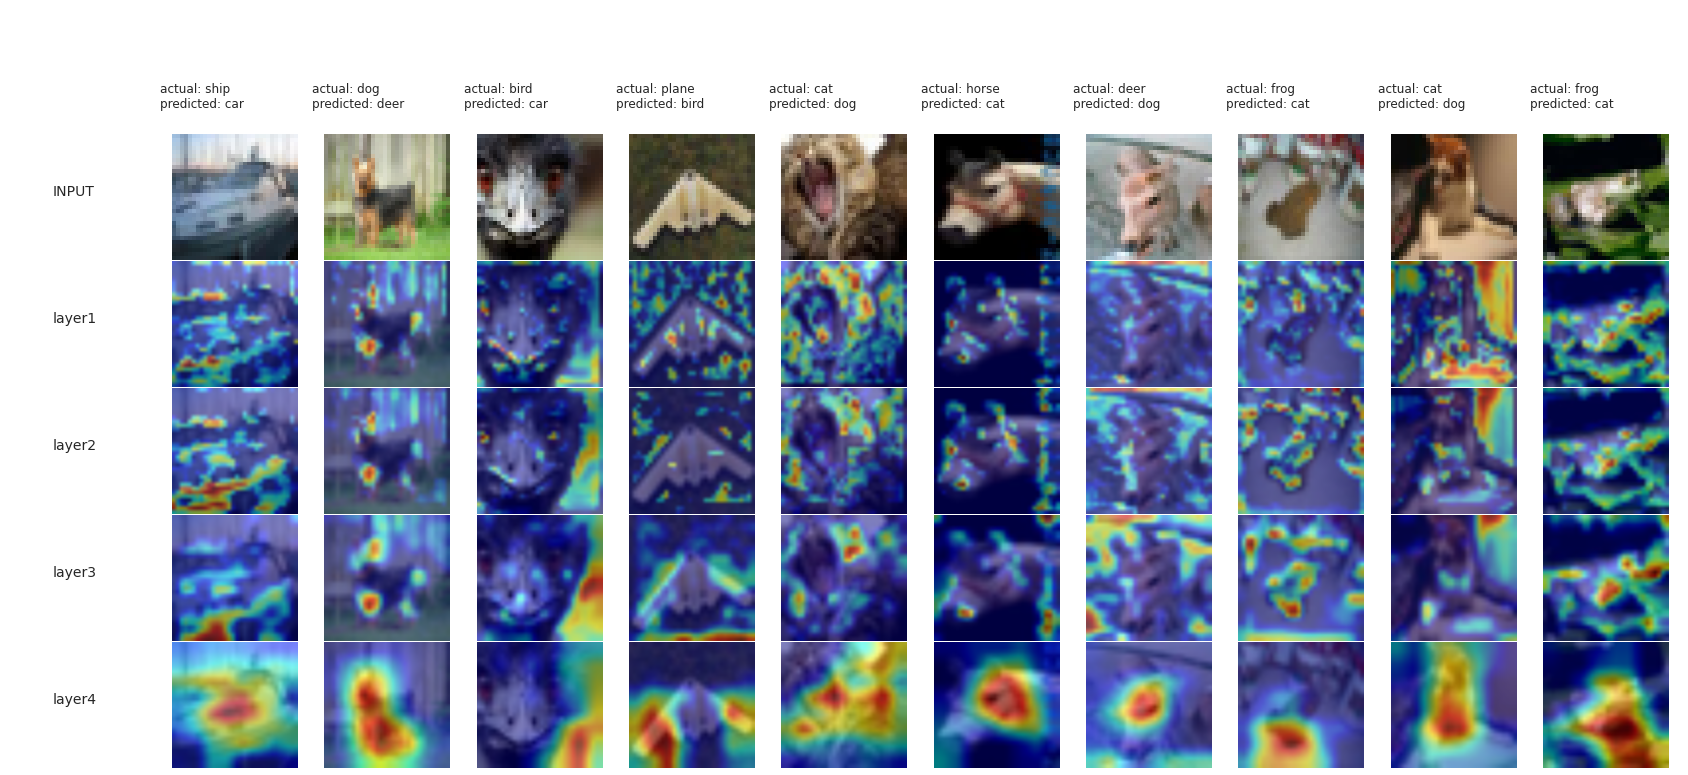

In [15]:
target_layers = ["layer1","layer2","layer3","layer4"]
gradcam_output, probs, predicted_classes = generate_gradcam(misclassified_images[:10], model, target_layers,device)
plot_gradcam(gradcam_output, target_layers, classes, (3, 32, 32),predicted_classes, misclassified_images[:10])

In [ ]:
gradcam_output, probs, predicted_classes = generate_gradcam(misclassified_images[10:20], model, target_layers,device)
plot_gradcam(gradcam_output, target_layers, classes, (3, 32, 32),predicted_classes, misclassified_images[10:20])

In [ ]:

%load_ext tensorboard
%tensorboard --logdir=runs